In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [2]:
data = np.array([[-1.920e+00,-1.422e+01,1.490e+00,-1.940e+00,-2.389e+00,-5.090e+00,
                 -8.861e+00,3.578e+00,-6.010e+00,-6.995e+00,3.634e+00,8.743e-01,
                 -1.096e+01,4.073e-01,-9.467e+00,8.560e+00,1.062e+01,-1.729e-01,
                  1.040e+01,-1.261e+01,1.574e-01,-1.304e+01,-2.156e+00,-1.210e+01,
                 -1.119e+01,2.902e+00,-8.220e+00,-1.179e+01,-8.391e+00,-4.505e+00],
                  [-1.051e+00,-2.482e-02,8.896e-01,-4.943e-01,-9.371e-01,4.306e-01,
                  9.577e-03,-7.944e-02 ,1.624e-01,-2.682e-01,-3.129e-01,8.303e-01,
                  -2.365e-02,5.098e-01,-2.777e-01,3.367e-01,1.927e-01,-2.222e-01,
                  6.352e-02,6.888e-03,3.224e-02,1.091e-02,-5.706e-01,-5.258e-02,
                  -3.666e-02,1.709e-01,-4.805e-02,2.008e-01,-1.904e-01,5.952e-01]])

In [3]:
def model(phi,x):
  sin_component = np.sin(phi[0] + 0.06 * phi[1] * x)
  gauss_component = np.exp(-(phi[0] + 0.06 * phi[1] * x) * (phi[0] + 0.06 * phi[1] * x) / 32)
  y_pred= sin_component * gauss_component
  return y_pred

In [4]:
def draw_model(data,model,phi,title=None):
  x_model = np.arange(-15,15,0.1)
  y_model = model(phi,x_model)

  fix, ax = plt.subplots()
  ax.plot(data[0,:],data[1,:],'bo')
  ax.plot(x_model,y_model,'m-')
  ax.set_xlim([-15,15]);ax.set_ylim([-1,1])
  ax.set_xlabel('x'); ax.set_ylabel('y')
  if title is not None:
    ax.set_title(title)
  plt.show()

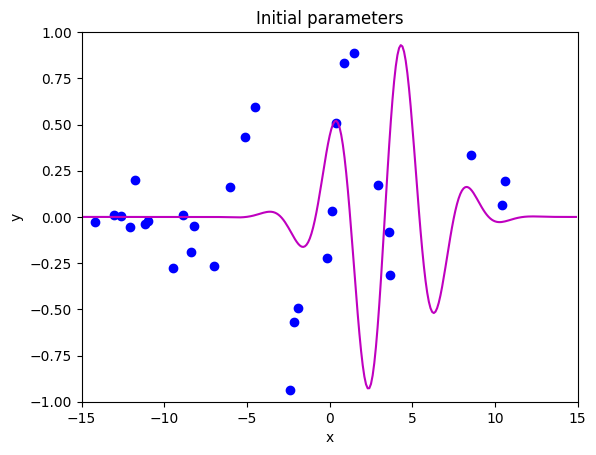

In [5]:
phi = np.zeros((2,1))
phi[0] =  -5     # Horizontal offset
phi[1] =  25     # Frequency
draw_model(data,model,phi, "Initial parameters")

In [6]:
def compute_loss(data_x, data_y, model, phi):
  # 1. First make model predictions from data x using current parameters phi
  # This typically calls your linear model: y = phi0 + phi1 * x
  pred_y = model(data_x, phi)
  
  # 2. Compute the squared difference between the predictions and true y values
  # 3. Then sum them all and return
  # This is Equation 5.10: L = Σ(y_pred - y_true)^2
  loss = np.sum((pred_y - data_y)**2)

  return loss

In [7]:
def compute_loss(data_x, data_y, model, phi):
  # 1. First make model predictions from data x using current parameters phi
  # This typically calls your linear model: y = phi0 + phi1 * x
  pred_y = model(data_x, phi)
  
  # 2. Compute the squared difference between the predictions and true y values
  # 3. Then sum them all and return
  # This is Equation 5.10: L = Σ(y_pred - y_true)^2
  loss = np.sum((pred_y - data_y)**2)

  return loss

In [8]:
loss = compute_loss(data[0,:],data[1,:],model,np.array([[0.6],[-0.2]]))
print('Your loss = %3.3f, Correct loss = %3.3f'%(loss, 16.419))

Your loss = 43.236, Correct loss = 16.419


In [10]:
def draw_loss_function(compute_loss, data,  model, phi_iters = None):
  # Define pretty colormap
  my_colormap_vals_hex =('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
  my_colormap_vals_dec = np.array([int(element,base=16) for element in my_colormap_vals_hex])
  r = np.floor(my_colormap_vals_dec/(256*256))
  g = np.floor((my_colormap_vals_dec - r *256 *256)/256)
  b = np.floor(my_colormap_vals_dec - r * 256 *256 - g * 256)
  my_colormap = ListedColormap(np.vstack((r,g,b)).transpose()/255.0)

  # Make grid of offset/frequency values to plot
  offsets_mesh, freqs_mesh = np.meshgrid(np.arange(-10,10.0,0.1), np.arange(2.5,22.5,0.1))
  loss_mesh = np.zeros_like(freqs_mesh)
  # Compute loss for every set of parameters
  for idslope, slope in np.ndenumerate(freqs_mesh):
     loss_mesh[idslope] = compute_loss(data[0,:], data[1,:], model, np.array([[offsets_mesh[idslope]], [slope]]))

  fig,ax = plt.subplots()
  fig.set_size_inches(8,8)
  ax.contourf(offsets_mesh,freqs_mesh,loss_mesh,256,cmap=my_colormap)
  ax.contour(offsets_mesh,freqs_mesh,loss_mesh,20,colors=['#80808080'])
  if phi_iters is not None:
    ax.plot(phi_iters[0,:], phi_iters[1,:],'go-')
  ax.set_ylim([2.5,22.5])
  ax.set_xlabel('Offset '); ax.set_ylabel('Frequency, ')
  plt.show()

In [11]:
# These came from writing out the expression for the sum of squares loss and taking the
# derivative with respect to phi0 and phi1. It was a lot of hassle to get it right!
def gabor_deriv_phi0(data_x,data_y,phi0, phi1):
    x = 0.06 * phi1 * data_x + phi0
    y = data_y
    cos_component = np.cos(x)
    sin_component = np.sin(x)
    gauss_component = np.exp(-0.5 * x *x / 16)
    deriv = cos_component * gauss_component - sin_component * gauss_component * x / 16
    deriv = 2* deriv * (sin_component * gauss_component - y)
    return np.sum(deriv)

def gabor_deriv_phi1(data_x, data_y,phi0, phi1):
    x = 0.06 * phi1 * data_x + phi0
    y = data_y
    cos_component = np.cos(x)
    sin_component = np.sin(x)
    gauss_component = np.exp(-0.5 * x *x / 16)
    deriv = 0.06 * data_x * cos_component * gauss_component - 0.06 * data_x*sin_component * gauss_component * x / 16
    deriv = 2*deriv * (sin_component * gauss_component - y)
    return np.sum(deriv)

def compute_gradient(data_x, data_y, phi):
    dl_dphi0 = gabor_deriv_phi0(data_x, data_y, phi[0],phi[1])
    dl_dphi1 = gabor_deriv_phi1(data_x, data_y, phi[0],phi[1])
    # Return the gradient
    return np.array([[dl_dphi0],[dl_dphi1]])
     

In [12]:
# Compute the gradient using your function
gradient = compute_gradient(data[0,:],data[1,:], phi)
print("Your gradients: (%3.3f,%3.3f)"%(gradient[0],gradient[1]))
# Approximate the gradients with finite differences
delta = 0.0001
dl_dphi0_est = (compute_loss(data[0,:],data[1,:],model,phi+np.array([[delta],[0]])) - \
                    compute_loss(data[0,:],data[1,:],model,phi))/delta
dl_dphi1_est = (compute_loss(data[0,:],data[1,:],model,phi+np.array([[0],[delta]])) - \
                    compute_loss(data[0,:],data[1,:],model,phi))/delta
print("Approx gradients: (%3.3f,%3.3f)"%(dl_dphi0_est,dl_dphi1_est))

Your gradients: (3.344,0.519)
Approx gradients: (21.028,-0.000)


C:\Users\PC\AppData\Local\Temp\ipykernel_19280\179689734.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Your gradients: (%3.3f,%3.3f)"%(gradient[0],gradient[1]))


In [13]:
def loss_function_1D(dist_prop, data, model, phi_start, gradient):
  # Return the loss after moving this far
  return compute_loss(data[0,:], data[1,:], model, phi_start+ gradient * dist_prop)

def line_search(data, model, phi, gradient, thresh=.00001, max_dist = 0.1, max_iter = 15, verbose=False):
    # Initialize four points along the range we are going to search
    a = 0
    b = 0.33 * max_dist
    c = 0.66 * max_dist
    d = 1.0 * max_dist
    n_iter = 0

    # While we haven't found the minimum closely enough
    while np.abs(b-c) > thresh and n_iter < max_iter:
        # Increment iteration counter (just to prevent an infinite loop)
        n_iter = n_iter+1
        # Calculate all four points
        lossa = loss_function_1D(a, data, model, phi,gradient)
        lossb = loss_function_1D(b, data, model, phi,gradient)
        lossc = loss_function_1D(c, data, model, phi,gradient)
        lossd = loss_function_1D(d, data, model, phi,gradient)

        if verbose:
          print('Iter %d, a=%3.3f, b=%3.3f, c=%3.3f, d=%3.3f'%(n_iter, a,b,c,d))
          print('a %f, b%f, c%f, d%f'%(lossa,lossb,lossc,lossd))

        # Rule #1 If point A is less than points B, C, and D then change B,C,D so they are half their current distance from A
        if np.argmin((lossa,lossb,lossc,lossd))==0:
          b = a+ (b-a)/2
          c = a+ (c-a)/2
          d = a+ (d-a)/2
          continue;

        # Rule #2 If point b is less than point c then
        #                     point d becomes point c, and
        #                     point b becomes 1/3 between a and new d
        #                     point c becomes 2/3 between a and new d
        if lossb < lossc:
          d = c
          b = a+ (d-a)/3
          c = a+ 2*(d-a)/3
          continue

        # Rule #2 If point c is less than point b then
        #                     point a becomes point b, and
        #                     point b becomes 1/3 between new a and d
        #                     point c becomes 2/3 between new a and d
        a = b
        b = a+ (d-a)/3
        c = a+ 2*(d-a)/3

    # Return average of two middle points
    return (b+c)/2.0

In [14]:
def gradient_descent_step(phi, data,  model):
  # Step 1:  Compute the gradient
  gradient = compute_gradient(data[0,:],data[1,:], phi)
  # Step 2:  Update the parameters -- note we want to search in the negative (downhill direction)
  alpha = line_search(data, model, phi, gradient*-1, max_dist = 2.0)
  phi = phi - alpha * gradient
  return phi

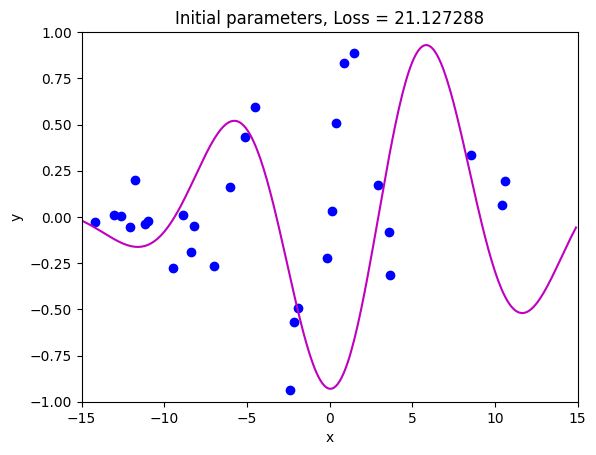

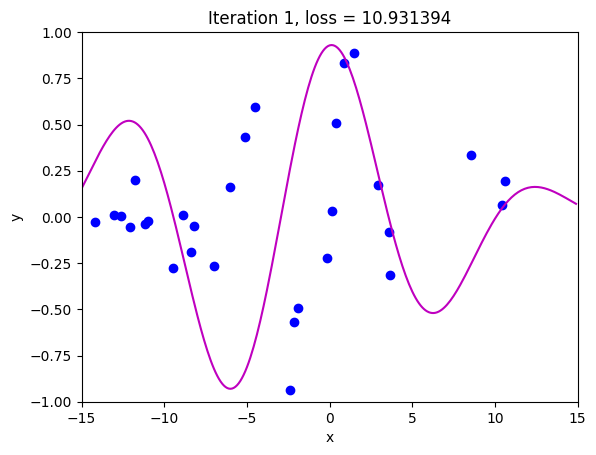

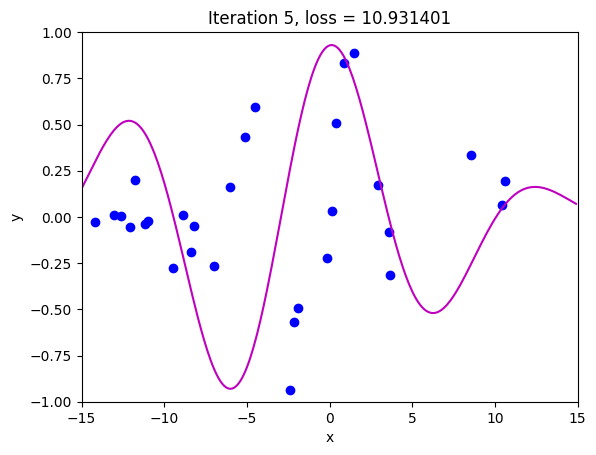

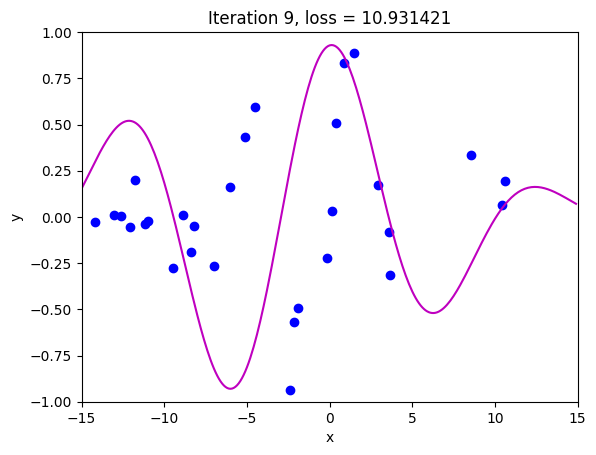

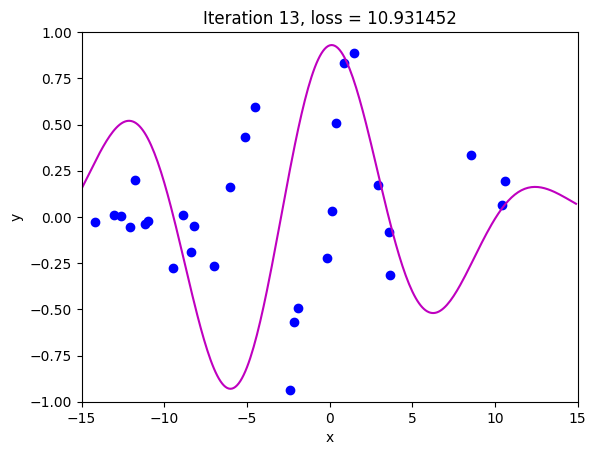

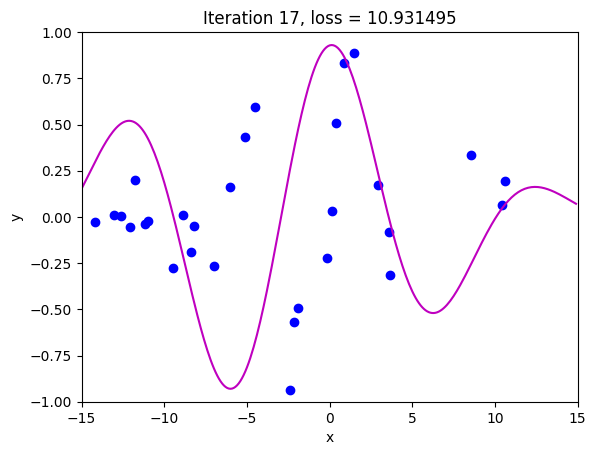

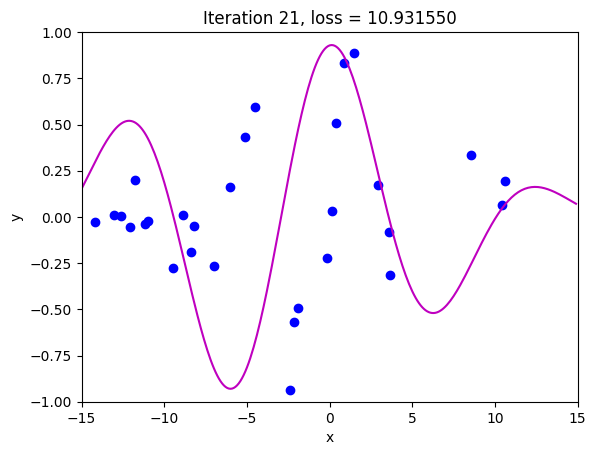

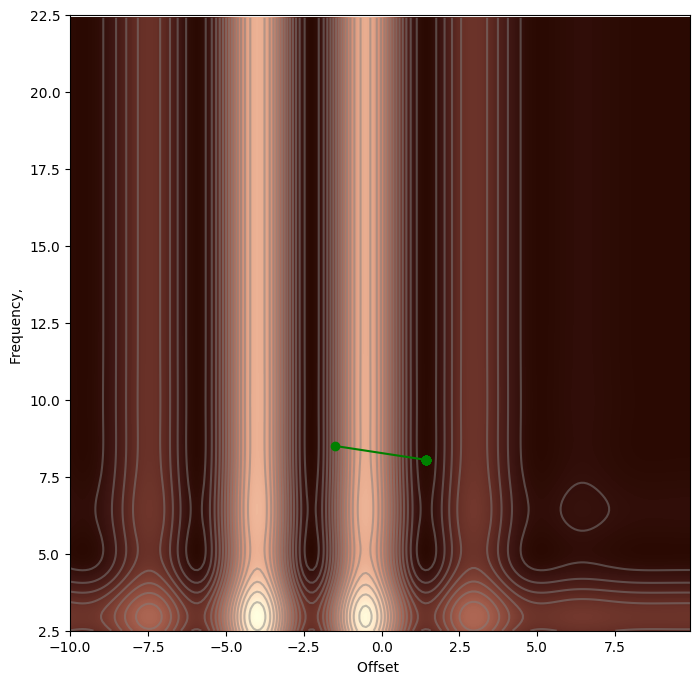

In [15]:
# Initialize the parameters
n_steps = 21
phi_all = np.zeros((2,n_steps+1))
phi_all[0,0] = -1.5
phi_all[1,0] = 8.5

# Measure loss and draw initial model
loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,0:1])
draw_model(data,model,phi_all[:,0:1], "Initial parameters, Loss = %f"%(loss))

for c_step in range (n_steps):
  # Do gradient descent step
  phi_all[:,c_step+1:c_step+2] = gradient_descent_step(phi_all[:,c_step:c_step+1],data, model)
  # Measure loss and draw model every 4th step
  if c_step % 4 == 0:
    loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2])
    draw_model(data,model,phi_all[:,c_step+1], "Iteration %d, loss = %f"%(c_step+1,loss))

draw_loss_function(compute_loss, data, model,phi_all)

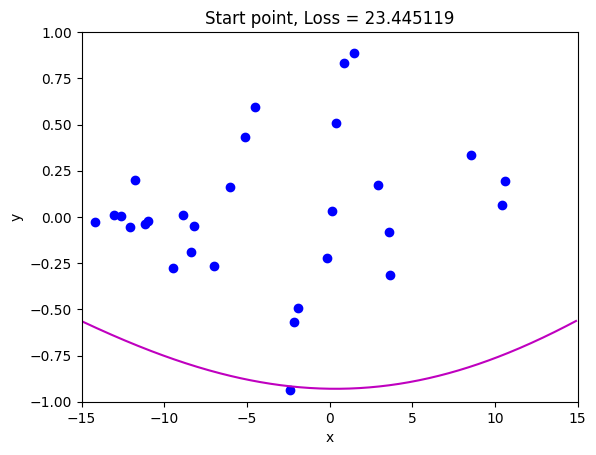

In [16]:
# --- EXPERIMENT: Starting in a different valley ---
n_steps = 10
phi_all = np.zeros((2, n_steps + 1))

# Try these different starting points to find different local minima:
# Valley A (the original):
# phi_all[0,0] = 1.6; phi_all[1,0] = -0.5

# Valley B (Try starting with very high/low intercept or negative slope):
phi_all[0,0] = -1.5 
phi_all[1,0] = 1.0

# Valley C (Try starting at zero):
# phi_all[0,0] = 0.0; phi_all[1,0] = 0.0

# Measure loss and draw initial model
loss = compute_loss(data[0,:], data[1,:], model, phi_all[:,0:1])
draw_model(data, model, phi_all[:,0:1], "Start point, Loss = %f"%(loss))

# Run the optimization loop
for c_step in range(n_steps):
    phi_all[:,c_step+1:c_step+2] = gradient_descent_step(phi_all[:,c_step:c_step+1], data, model)
    loss = compute_loss(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2])
    # draw_model calls here to visualize the descent

In [17]:
def gradient_descent_step_fixed_learning_rate(phi, data, alpha):
  # Extract data for convenience
  data_x = data[0,:]
  data_y = data[1,:]

  # 1. Compute the gradient using the same function from earlier
  # This provides the direction (vector) of steepest increase
  gradient = compute_gradient(data_x, data_y, phi)

  # 2. Update the parameters phi based on the gradient and the FIXED step size alpha
  # Equation 6.3: phi_new = phi_old - alpha * gradient
  # Here, we don't call line_search; we use the alpha passed as an argument
  phi = phi - alpha * gradient

  return phi

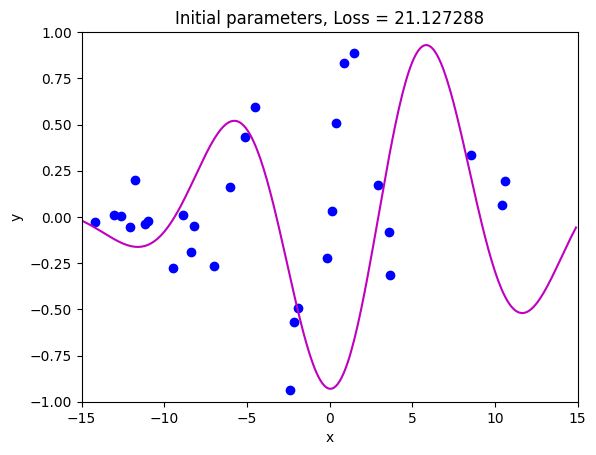

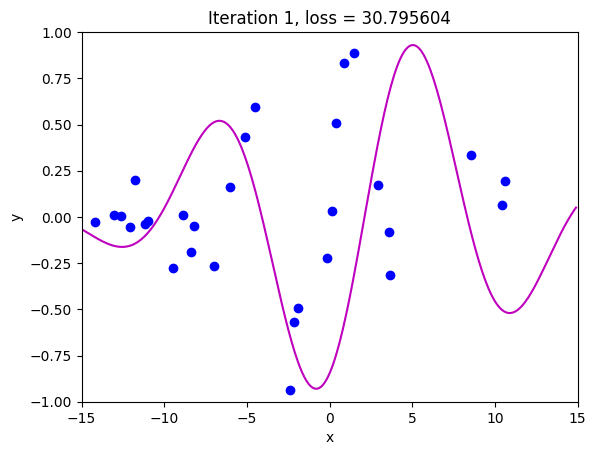

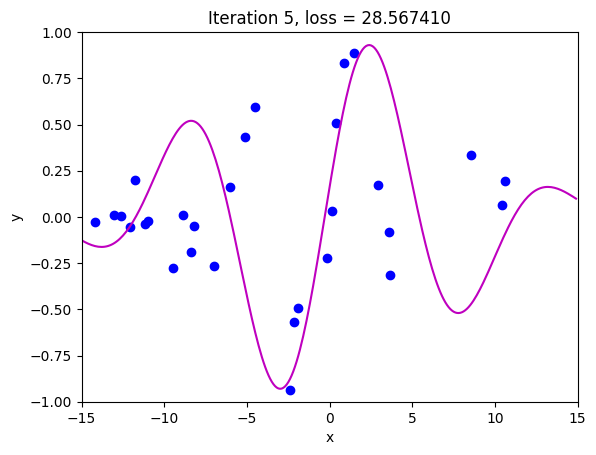

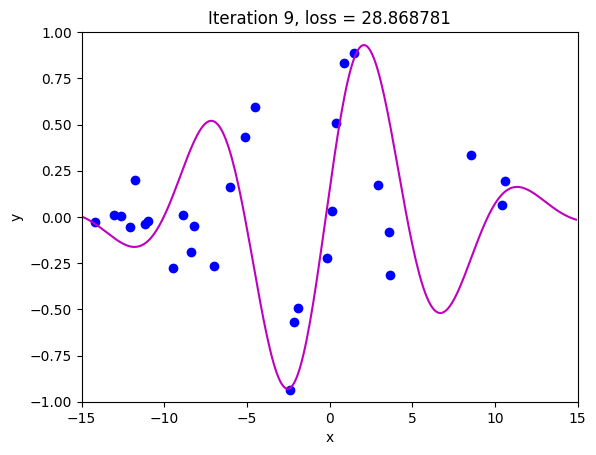

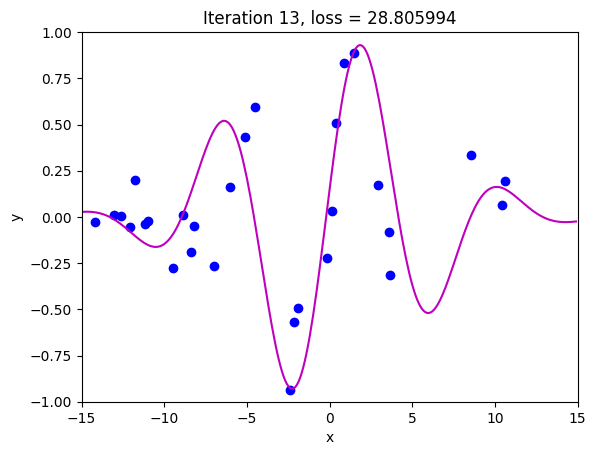

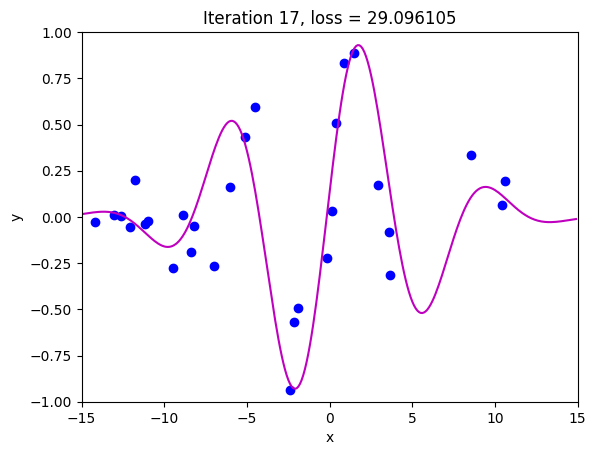

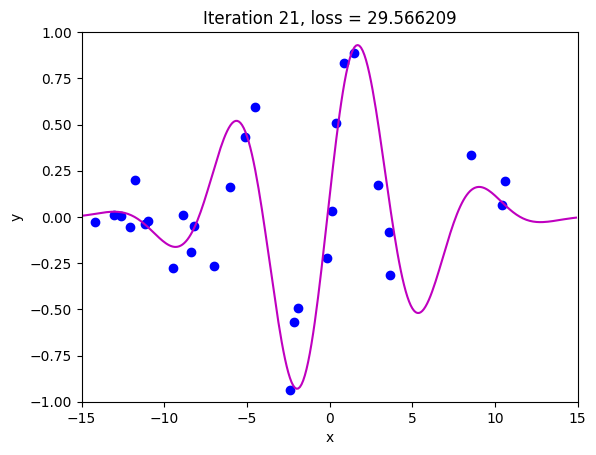

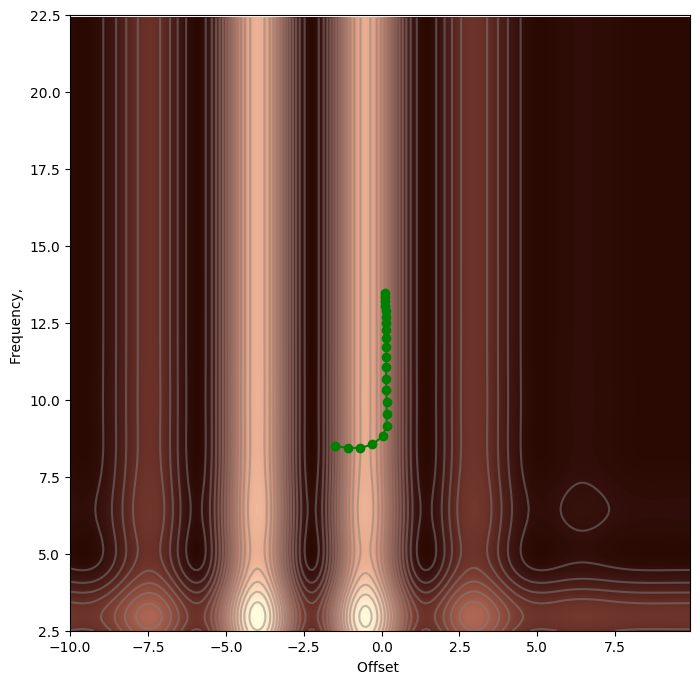

In [18]:
# Initialize the parameters
n_steps = 21
phi_all = np.zeros((2,n_steps+1))
phi_all[0,0] = -1.5
phi_all[1,0] = 8.5

# Measure loss and draw initial model
loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,0:1])
draw_model(data,model,phi_all[:,0:1], "Initial parameters, Loss = %f"%(loss))

for c_step in range (n_steps):
  # Do gradient descent step
  phi_all[:,c_step+1:c_step+2] = gradient_descent_step_fixed_learning_rate(phi_all[:,c_step:c_step+1],data, alpha =0.2)
  # Measure loss and draw model every 4th step
  if c_step % 4 == 0:
    loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2])
    draw_model(data,model,phi_all[:,c_step+1], "Iteration %d, loss = %f"%(c_step+1,loss))

draw_loss_function(compute_loss, data, model,phi_all)

In [19]:
# Try alpha = 0.001 (Too small)
# Try alpha = 0.05  (Just right)
# Try alpha = 0.2   (Too large - watch it bounce)
alpha_test = 0.2 

for c_step in range(n_steps):
    # Use the fixed learning rate version
    phi_all[:,c_step+1:c_step+2] = gradient_descent_step_fixed_learning_rate(
        phi_all[:,c_step:c_step+1], data, alpha_test
    )
    
    loss = compute_loss(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2])
    print(f"Step {c_step+1}, Loss: {loss}")

Step 1, Loss: 30.795603913885866
Step 2, Loss: 36.030349892936236
Step 3, Loss: 35.542203924677864
Step 4, Loss: 31.01790575392758
Step 5, Loss: 28.567409911719164
Step 6, Loss: 28.663983059955044
Step 7, Loss: 28.64621410467279
Step 8, Loss: 28.853052771007995
Step 9, Loss: 28.868781221326685
Step 10, Loss: 28.909261685421697
Step 11, Loss: 28.830403515488346
Step 12, Loss: 28.85837871791903
Step 13, Loss: 28.80599376652888
Step 14, Loss: 28.916021641004146
Step 15, Loss: 28.9054036065255
Step 16, Loss: 29.093863659314245
Step 17, Loss: 29.096105224914325
Step 18, Loss: 29.337145553305636
Step 19, Loss: 29.327848656718313
Step 20, Loss: 29.600769690281645
Step 21, Loss: 29.566208598952223


In [20]:
def stochastic_gradient_descent_step(phi, data, alpha, batch_size):
  # 1. Determine the total number of data points
  n_data = data.shape[1]
  
  # 2. Generate a random permutation of indices from 0 to n_data-1
  perm = np.random.permutation(n_data)
  
  # 3. Choose the first batch_size indices from that permutation
  batch_indices = perm[:batch_size]
  
  # 4. Extract the subset (batch) of the data
  batch_data_x = data[0, batch_indices]
  batch_data_y = data[1, batch_indices]
  
  # 5. Compute the gradient using ONLY this batch
  # We reuse your compute_gradient function but pass it the smaller batch
  gradient = compute_gradient(batch_data_x, batch_data_y, phi)
  
  # 6. Update the parameters phi based on the batch gradient and fixed alpha
  phi = phi - alpha * gradient

  return phi

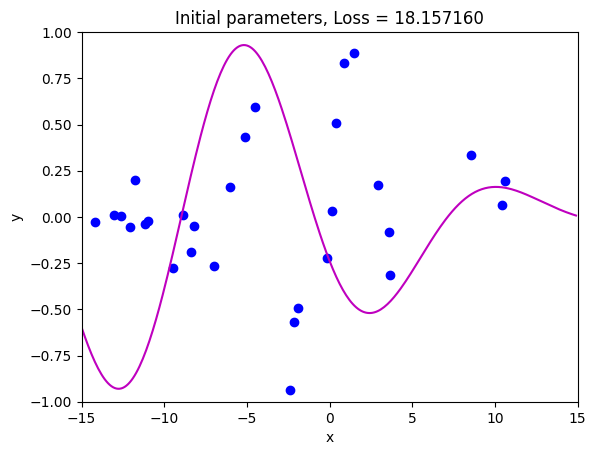

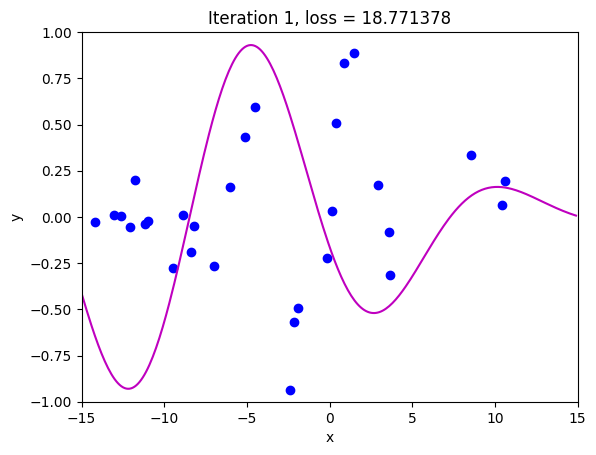

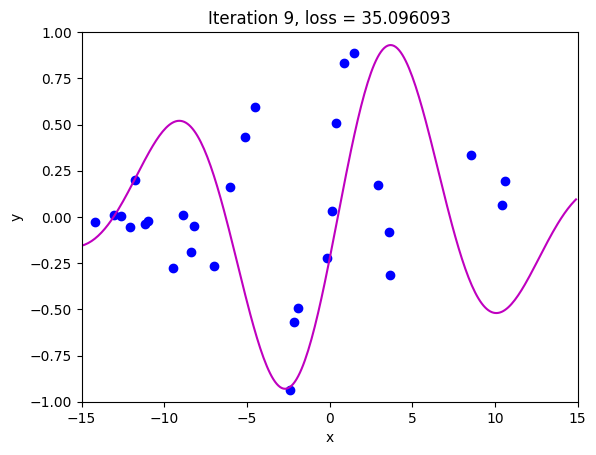

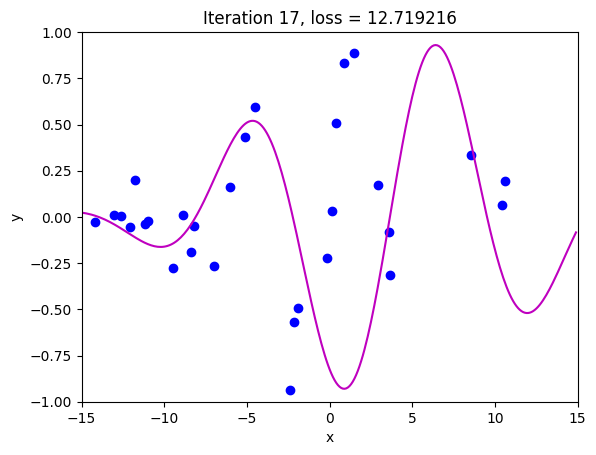

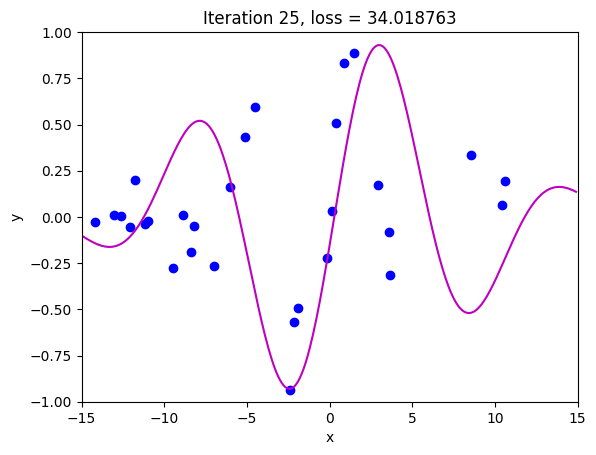

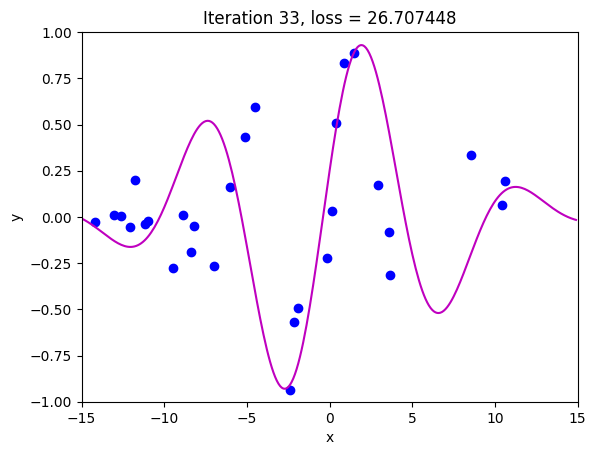

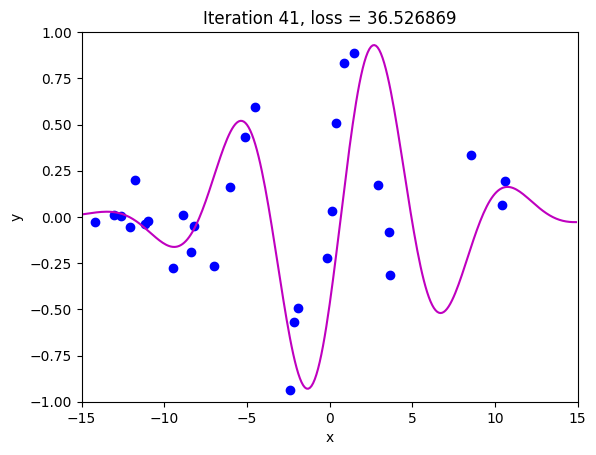

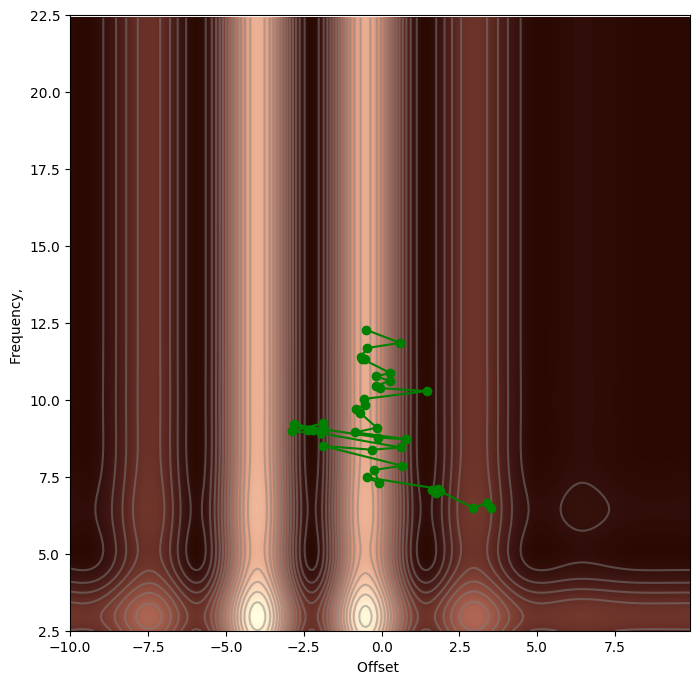

In [21]:
# Set the random number generator so you always get same numbers (disable if you don't want this)
np.random.seed(1)
# Initialize the parameters
n_steps = 41
phi_all = np.zeros((2,n_steps+1))
phi_all[0,0] = 3.5
phi_all[1,0] = 6.5

# Measure loss and draw initial model
loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,0:1])
draw_model(data,model,phi_all[:,0:1], "Initial parameters, Loss = %f"%(loss))

for c_step in range (n_steps):
  # Do gradient descent step
  phi_all[:,c_step+1:c_step+2] = stochastic_gradient_descent_step(phi_all[:,c_step:c_step+1],data, alpha =0.8, batch_size=5)
  # Measure loss and draw model every 8th step
  if c_step % 8 == 0:
    loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2])
    draw_model(data,model,phi_all[:,c_step+1], "Iteration %d, loss = %f"%(c_step+1,loss))

draw_loss_function(compute_loss, data, model,phi_all)

In [22]:
# --- EXPERIMENT: SGD with Learning Rate Decay ---
n_steps = 100
batch_size = 2
initial_alpha = 0.1  # Start with a relatively large alpha

phi_all = np.zeros((2, n_steps + 1))
phi_all[0,0] = 1.6
phi_all[1,0] = -0.5

for c_step in range(n_steps):
    # Exponential Decay Rule: alpha gets smaller every step
    # As c_step increases, current_alpha decreases
    current_alpha = initial_alpha * (0.95 ** c_step)
    
    # Take a stochastic step with the NEW alpha
    phi_all[:, c_step+1:c_step+2] = stochastic_gradient_descent_step(
        phi_all[:, c_step:c_step+1], data, current_alpha, batch_size
    )
    
    if c_step % 10 == 0:
        loss = compute_loss(data[0,:], data[1,:], model, phi_all[:, c_step+1:c_step+2])
        print(f"Step {c_step}, Alpha: {current_alpha:.4f}, Loss: {loss:.4f}")

Step 0, Alpha: 0.1000, Loss: 37.1910
Step 10, Alpha: 0.0599, Loss: 42.6010
Step 20, Alpha: 0.0358, Loss: 44.0127
Step 30, Alpha: 0.0215, Loss: 44.5399
Step 40, Alpha: 0.0129, Loss: 44.6197
Step 50, Alpha: 0.0077, Loss: 44.6487
Step 60, Alpha: 0.0046, Loss: 44.6673
Step 70, Alpha: 0.0028, Loss: 44.6550
Step 80, Alpha: 0.0017, Loss: 44.6751
Step 90, Alpha: 0.0010, Loss: 44.6687


In [23]:
# Initialization
n_steps = 100
batch_size = 2
alpha = 0.2     # Starting learning rate
beta = 0.5      # Factor to reduce by (e.g., cut in half)
M = 20          # How often to reduce (every 20 iterations)

phi_all = np.zeros((2, n_steps + 1))
phi_all[:, 0:1] = np.array([[1.6], [-0.5]])

# Training Loop
for c_step in range(n_steps):
    # TODO -- Add a learning rate schedule
    # Check if we have reached M iterations
    if c_step > 0 and c_step % M == 0:
        alpha = alpha * beta
        print(f"Step {c_step}: Reducing learning rate to {alpha}")

    # Do stochastic gradient descent step with the updated alpha
    phi_all[:, c_step+1:c_step+2] = stochastic_gradient_descent_step(
        phi_all[:, c_step:c_step+1], data, alpha, batch_size
    )

    # Optional: Measure loss
    if c_step % 10 == 0:
        loss = compute_loss(data[0,:], data[1,:], model, phi_all[:, c_step+1:c_step+2])
        print(f"Iteration {c_step}, loss = {loss:f}")

Iteration 0, loss = 37.077085
Iteration 10, loss = 44.445798
Step 20: Reducing learning rate to 0.1
Iteration 20, loss = 44.700647
Iteration 30, loss = 44.296023
Step 40: Reducing learning rate to 0.05
Iteration 40, loss = 43.954517
Iteration 50, loss = 43.706217
Step 60: Reducing learning rate to 0.025
Iteration 60, loss = 43.383019
Iteration 70, loss = 43.165080
Step 80: Reducing learning rate to 0.0125
Iteration 80, loss = 43.171577
Iteration 90, loss = 43.137503
